In [12]:
import pandas as pd
# Load data
df = pd.read_csv("Desktop/Ikah Consulting/Freelance/Portfolio Projects/Healthcare Project/Data/diabetes_readmission.csv")
# Preview
print("Shape of dataset:", df.shape)
print("\nSample rows:")
display(df.head())

print("\nColumns:")
print(df.columns.tolist())
# Check for number of rows and columns

Shape of dataset: (101766, 50)

Sample rows:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO



Columns:
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [22]:
# Clean column names (remove spaces, lowercase everything just in case)
df.columns = df.columns.str.strip().str.lower()

print(df.columns.tolist()) 

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'target', 'race_africanamerican', 'race_asian', 'race_caucasian', 'race_hispanic', 'race_other', 'gender_male', 'gender_unknown/invalid', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'weight_?', 'weight_[0-25)', 'weight_[100-125)', 'weight_[125-150)', 'weight_[150-175)', 'weight_[175-200)', 'weight_[25-50)', 'weight_[50-75)', 'weight_[75-100)', 'payer_code_bc', 'payer_code_ch', 'payer_code_cm', 'payer_code_cp', 'payer_code_dm', 'payer_code_fr', 'payer_code_hm', 'payer_code_mc', 'payer_code_md', 'payer_code_mp', 'payer_code_og', 'payer_code_ot', 'payer_code_po', 'payer_code_si', 'payer_code_sp', 'payer_code_un', 'payer_code_wc', 'medical_specialty_allergyandimmunology'

In [24]:
# -------------------------------
# Step 3.5: Explore Target Column
# -------------------------------

print("\nUnique values in 'target':", df['target'].unique())
print("\nValue counts for 'target':")
print(df['target'].value_counts())


Unique values in 'target': [0 1]

Value counts for 'target':
0    90409
1    11357
Name: target, dtype: int64


In [25]:
# -------------------------------
# Step 4: Clean & Prepare Data
# -------------------------------

# Drop IDs that are not useful for modeling
df = df.drop(["encounter_id", "patient_nbr"], axis=1, errors="ignore")

# Target (1 = readmitted within 30 days, 0 = otherwise)

# Handle categorical features with one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

print("Shape after encoding:", df.shape)
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Shape after encoding: (101766, 2435)
Features shape: (101766, 2434)
Target shape: (101766,)


In [26]:
# -------------------------------
# Step 5: Train-Test Split
# -------------------------------
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, " | Test set:", X_test.shape)


Training set: (81412, 2434)  | Test set: (20354, 2434)


In [28]:
# -------------------------------
# Step 6: Train & Evaluate Model
# -------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"  # handles class imbalance
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[18077     6]
 [ 2261    10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.62      0.00      0.01      2271

    accuracy                           0.89     20354
   macro avg       0.76      0.50      0.47     20354
weighted avg       0.86      0.89      0.84     20354



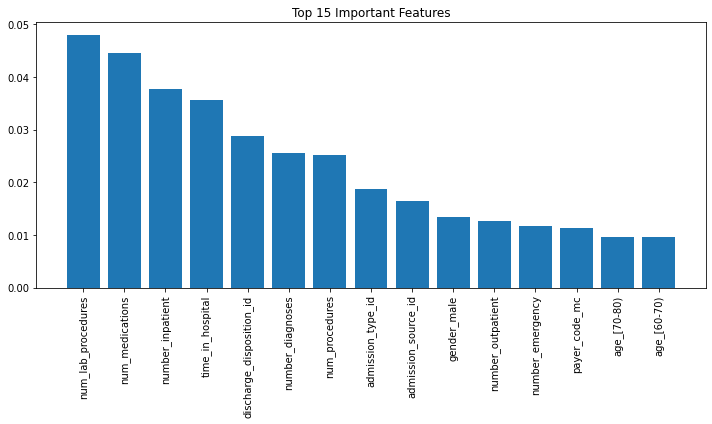

In [29]:
# -------------------------------
# Step 7: Feature Importance
# -------------------------------
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.title("Top 15 Important Features")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), [X.columns[i] for i in indices[:15]], rotation=90)
plt.tight_layout()
plt.show()


In [30]:
# -------------------------------
# Step 8: Try Gradient Boosting
# -------------------------------
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Classification Report:\n")
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.53      0.01      0.02      2271

    accuracy                           0.89     20354
   macro avg       0.71      0.50      0.48     20354
weighted avg       0.85      0.89      0.84     20354



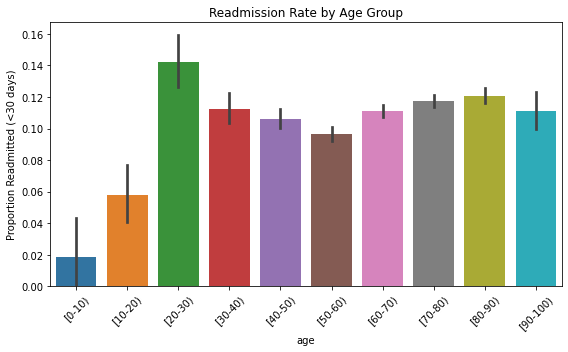

In [9]:
# -------------------------------
# Step 9a: Readmission by Age Group
# -------------------------------
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure visuals folder exists
os.makedirs("visuals", exist_ok=True)

# Reload clean data for visualization
df_viz = pd.read_csv("Desktop/Ikah Consulting/Freelance/Portfolio Projects/Healthcare Project/Data/diabetes_readmission.csv")

# Recreate target column
df_viz["target"] = df_viz["readmitted"].apply(lambda x: 1 if x == "<30" else 0)

plt.figure(figsize=(8,5))
sns.barplot(data=df_viz, x="age", y="target", estimator=lambda x: sum(x)/len(x))
plt.title("Readmission Rate by Age Group")
plt.ylabel("Proportion Readmitted (<30 days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visuals/readmission_by_age.png")  #SaveVisual
plt.show()

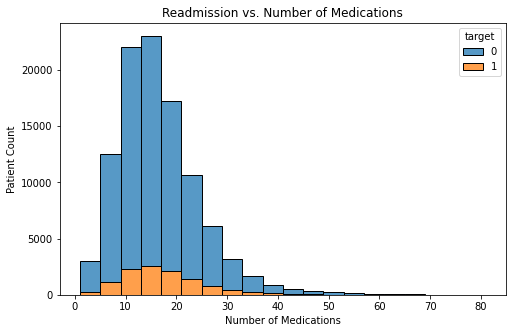

In [12]:
# -------------------------------
# Step 9b: Readmission by Number of Medications
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=df_viz, x="num_medications", hue="target",
    bins=20, multiple="stack"
)
plt.title("Readmission vs. Number of Medications")
plt.xlabel("Number of Medications")
plt.ylabel("Patient Count")
plt.savefig("visuals/readmission_by_medication.png")  # Save
plt.show()

# Target: 0 = not readmitted withing 30 days, 1 = readmitted within 30 days

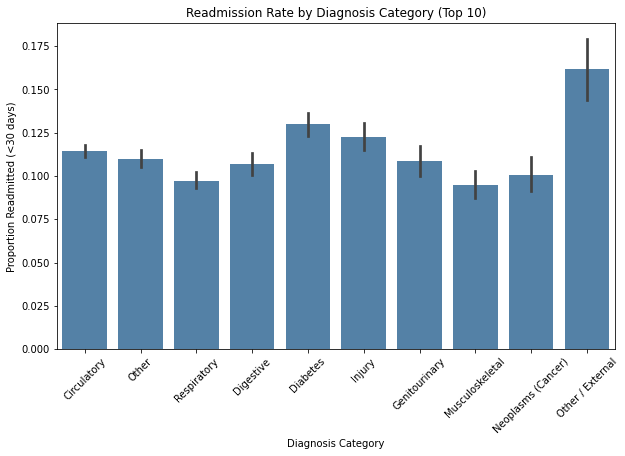


Top 10 Diagnosis Categories:
Circulatory           30437
Other                 16527
Respiratory           14423
Digestive              9475
Diabetes               8757
Injury                 6974
Genitourinary          5117
Musculoskeletal        4957
Neoplasms (Cancer)     3433
Other / External       1645
Name: diag_category, dtype: int64


In [13]:
# --- 9c: Readmission by Primary Diagnosis ---
# Function to map ICD-9 diagnosis codes into categories
def map_diag_code(code):
    try:
        code = str(code)
        if code.startswith("V") or code.startswith("E"):
            return "Other / External"
        num = float(code)

        if 390 <= num <= 459 or num == 785:
            return "Circulatory"
        elif 460 <= num <= 519 or num == 786:
            return "Respiratory"
        elif 520 <= num <= 579 or num == 787:
            return "Digestive"
        elif 250 <= num < 251:
            return "Diabetes"
        elif 800 <= num <= 999:
            return "Injury"
        elif 710 <= num <= 739:
            return "Musculoskeletal"
        elif 580 <= num <= 629 or num == 788:
            return "Genitourinary"
        elif 140 <= num <= 239:
            return "Neoplasms (Cancer)"
        else:
            return "Other"
    except:
        return "Unknown"

# Apply mapping to primary diagnosis
df_viz["diag_category"] = df_viz["diag_1"].apply(map_diag_code)

# Top 10 most frequent categories
top_cats = df_viz["diag_category"].value_counts().nlargest(10).index
df_diag = df_viz[df_viz["diag_category"].isin(top_cats)]

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_diag, x="diag_category", y="target",
    estimator=lambda x: sum(x)/len(x), order=top_cats, color="steelblue"
)
plt.title("Readmission Rate by Diagnosis Category (Top 10)")
plt.ylabel("Proportion Readmitted (<30 days)")
plt.xlabel("Diagnosis Category")
plt.xticks(rotation=45)
plt.savefig("visuals/readmission_by_diagnosis.png")  # Save
plt.show()

# Print frequency table for reference
print("\nTop 10 Diagnosis Categories:")
print(df_viz["diag_category"].value_counts().nlargest(10))

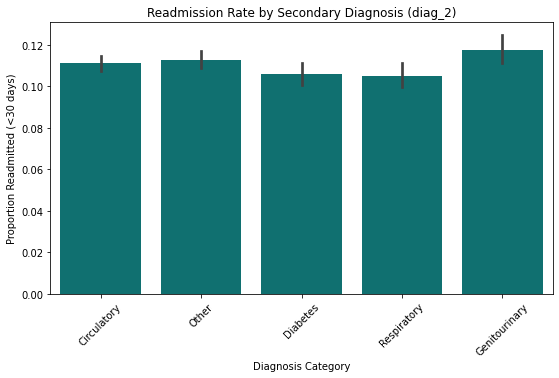


Top 5 diag_2 Categories:
Circulatory      31881
Other            24017
Diabetes         12794
Respiratory      10895
Genitourinary     8376
Name: diag2_category, dtype: int64


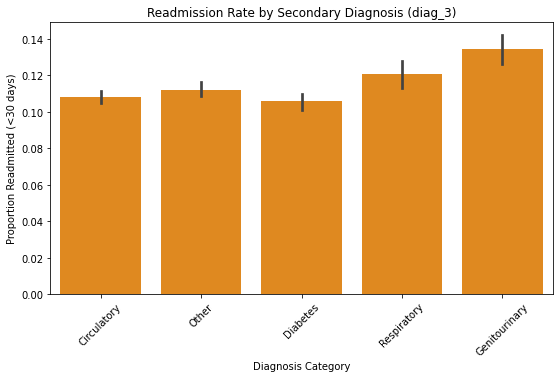


Top 5 diag_3 Categories:
Circulatory      30306
Other            24137
Diabetes         17157
Respiratory       7358
Genitourinary     6680
Name: diag3_category, dtype: int64


In [15]:
# -------------------------------
# Step 9d: Readmission by Secondary Diagnoses
# -------------------------------

# Apply mapping to diag_2 and diag_3
df_viz["diag2_category"] = df_viz["diag_2"].apply(map_diag_code)
df_viz["diag3_category"] = df_viz["diag_3"].apply(map_diag_code)

# Top 5 categories for diag_2
top_diag2 = df_viz["diag2_category"].value_counts().nlargest(5).index
df_diag2 = df_viz[df_viz["diag2_category"].isin(top_diag2)]

plt.figure(figsize=(9,5))
sns.barplot(
    data=df_diag2, x="diag2_category", y="target",
    estimator=lambda x: sum(x)/len(x), order=top_diag2, color="teal"
)
plt.title("Readmission Rate by Secondary Diagnosis (diag_2)")
plt.ylabel("Proportion Readmitted (<30 days)")
plt.xlabel("Diagnosis Category")
plt.xticks(rotation=45)
plt.savefig("visuals/readmission_by_diagnosis_desc1.png")  # Save
plt.show()

print("\nTop 5 diag_2 Categories:")
print(df_viz["diag2_category"].value_counts().nlargest(5))

# Top 5 categories for diag_3
top_diag3 = df_viz["diag3_category"].value_counts().nlargest(5).index
df_diag3 = df_viz[df_viz["diag3_category"].isin(top_diag3)]

plt.figure(figsize=(9,5))
sns.barplot(
    data=df_diag3, x="diag3_category", y="target",
    estimator=lambda x: sum(x)/len(x), order=top_diag3, color="darkorange"
)
plt.title("Readmission Rate by Secondary Diagnosis (diag_3)")
plt.ylabel("Proportion Readmitted (<30 days)")
plt.xlabel("Diagnosis Category")
plt.xticks(rotation=45)
plt.savefig("visuals/readmission_by_diagnosis_desc2.png")  # Save
plt.show()

print("\nTop 5 diag_3 Categories:")
print(df_viz["diag3_category"].value_counts().nlargest(5))